<a href="https://colab.research.google.com/github/Rajath-R-Prasad/IMDb_Analysis/blob/main/IMDb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Data analysis by scraping the data

## Importing libraries

In [ ]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from bs4 import BeautifulSoup
import requests

In [ ]:
url="https://www.imdb.com/search/title/?title_type=feature&user_rating=7,10&primary_language=kn&count=250&sort=num_votes,desc"

headers = {'Accept': '*/*', 'Connection': 'keep-alive', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/115.0.0.0 Safari/537.36', 'Accept-Language':'en-US;q=0.5,en;q=0.3', 'Cache-Control': 'max-age=0', 'Upgrade-Insecure-Requests': '1'}

response=requests.get(url,headers=headers)

## Web Scraping using beautiful soup

### Initiating an instance of  BeautifulSoup.

In [ ]:
soup = BeautifulSoup(response.content,'html.parser')

In [328]:
moviedata=soup.find('script',id='__NEXT_DATA__')
movie_json = json.loads(moviedata.string)
jsonmovie=json.dumps(movie_json,indent=2)
movies=movie_json['props']['pageProps']['searchResults']['titleResults']['titleListItems']

### Extracting required information

In [ ]:
movie_title_list=[]
for movie in movies:
  movie_title_list.append(movie['originalTitleText'])
print(movie_title_list)
print(len(movie_title_list))

['K.G.F: Chapter 2', 'Kantara', 'K.G.F: Chapter 1', 'Kaiva', '777 Charlie', 'RangiTaranga', 'Lucia', 'Ulidavaru Kandanthe', 'Garuda Gamana Vrishabha Vahana', 'Avane Srimannarayana', 'Sapta Sagaradaache Ello: Side A', 'James', 'Uppi 2', 'Kirik Party', 'Dia', 'Ugramm', 'Vadakkan', 'Raajakumara', 'Love Mocktail', 'Sapta Sagaradaache Ello: Side B', 'Rathnan Prapancha', 'Om', 'U Turn', 'Mungaru Male', 'Upendra', 'Tatsama Tadbhava', 'Godhi Banna Sadharana Mykattu', 'Kaatera', 'MAX', 'Kavaludaari', 'Toby', 'Googly', 'Nimma Vasthugalige Neeve Javaabdaararu', 'Mandya', 'BTS: Behind the Scenes', 'Sarkari. Hi. Pra. Shale Kasaragodu, Koduge: Ramanna Rai', 'Krishnam Pranaya Sakhi', 'Gandhada Gudi', 'Bell Bottom', 'Thithi', 'Super', 'A: Film by Upendra', 'Love Mocktail 2', 'Mr. And Mrs. Ramchari', 'Simple Agi Ondh Love Story', 'Mufti', 'Murphy', 'Dollu', 'Kendasampige', 'Tagaru', 'Pratyartha', 'Naale Rajaa Koli Majaa', 'Shivaji Surathkal', 'Jackie', 'Hostel Hudugaru Bekagiddare', 'Birbal Trilogy: Ca

In [ ]:
rating_list=[]

for movie in movies:
  rating_list.append(movie['ratingSummary']['aggregateRating'])
print(rating_list)
print(len(rating_list))

[8.2, 8.2, 8.2, 8.2, 8.7, 8.1, 8.3, 8.4, 8.2, 7.7, 8.2, 7.3, 7.8, 8.2, 8, 8, 7.2, 7.9, 8.2, 8, 8.3, 8.9, 7.4, 8.4, 8.8, 7.4, 8.6, 7.2, 7.1, 7.9, 7.2, 7.5, 7, 8.1, 7.8, 8.7, 7.4, 8.9, 8.1, 8, 8, 8.7, 7.4, 7.3, 8, 7.8, 7, 7.2, 8.3, 7.9, 7, 8.2, 7.1, 7.5, 7.2, 7.7, 7.3, 7.6, 7.9, 7.1, 7.1, 7.8, 8.4, 8.4, 7.9, 8.3, 8.3, 8.6, 7.1, 7.9, 7.9, 8.2, 7.5, 7, 7.7, 7.8, 7.3, 7.2, 7.9, 9, 7, 7.1, 7.3, 7.8, 7.5, 7.5, 7, 8.6, 8.4, 7.9, 7.1, 7.8, 8.4, 7.5, 8.9, 7.3, 7.5, 8.3, 7.5, 7.8, 8, 7.2, 8.5, 7.7, 7.8, 7.7, 8.4, 7.8, 7.8, 8, 7.4, 7.3, 7.8, 7.2, 8.5, 7.5, 7.5, 8.3, 8.5, 8.1, 7.7, 7, 8.6, 7.4, 7.4, 8.1, 9.3, 8.4, 7, 9.3, 8.9, 7.1, 8.4, 7.5, 7.8, 7.8, 8.4, 7.7, 9.4, 7.2, 8.2, 8.7, 9.3, 7.5, 7.8, 7.9, 8.2, 8.9, 7.7, 7.2, 8.4, 7.5, 8, 8, 8.2, 7.6, 9.3, 8, 7.4, 7.9, 8, 8.7, 8.1, 9, 7.3, 8.4, 7.3, 7.8, 8.5, 8.9, 8.4, 9, 8.6, 9.2, 7.3, 8.1, 9.2, 8.7, 9.1, 8.4, 8.5, 9.5, 7.3, 7.8, 8.2, 9.1, 9.4, 8.4, 7.8, 8.6, 8.4, 8.7, 8.5, 8.4, 7.2, 8.8, 7.2, 9.6, 7.8, 9.5, 8.4, 7.8, 7.9, 7.2, 8.9, 7.9, 9.3, 8.9, 8.8, 

In [ ]:
rating_count=[]

for movie in movies:
  rating_count.append(movie['ratingSummary']['voteCount'])
print(rating_count)
print(len(rating_count))

[159891, 108307, 105348, 68982, 43659, 15656, 13645, 9837, 8784, 8687, 8667, 8658, 8532, 7774, 7620, 7472, 5824, 4733, 4690, 4689, 4341, 4339, 4178, 4104, 3959, 3811, 3789, 3571, 3504, 3460, 3318, 3295, 3251, 3242, 3184, 3136, 3102, 3007, 2957, 2885, 2801, 2689, 2680, 2671, 2594, 2519, 2382, 2289, 2188, 2159, 2157, 2090, 2060, 2011, 1934, 1830, 1761, 1690, 1663, 1596, 1587, 1586, 1538, 1495, 1473, 1467, 1433, 1431, 1423, 1359, 1357, 1351, 1345, 1342, 1289, 1285, 1259, 1243, 1224, 1213, 1206, 1205, 1203, 1154, 1133, 1133, 1125, 1120, 1119, 1112, 1102, 1102, 1088, 1085, 1077, 1076, 1071, 1068, 1062, 1060, 1057, 1056, 1056, 1053, 1051, 1047, 1034, 1034, 1028, 1022, 987, 960, 955, 952, 913, 905, 889, 889, 885, 885, 885, 877, 877, 874, 873, 862, 855, 853, 838, 837, 836, 832, 831, 825, 806, 805, 787, 785, 776, 767, 760, 746, 731, 724, 704, 704, 694, 692, 690, 686, 678, 659, 649, 647, 637, 627, 619, 616, 603, 599, 591, 583, 580, 574, 573, 570, 568, 568, 566, 562, 555, 554, 554, 553, 552, 550,

In [ ]:
year=[]

for movie in movies:
  year.append(movie['releaseYear'])
print(year)
print(len(year))

[2022, 2022, 2018, 2023, 2022, 2015, 2013, 2014, 2021, 2019, 2023, 2022, 2015, 2016, 2020, 2014, 2025, 2017, 2020, 2023, 2021, 1995, 2016, 2006, 1999, 2023, 2016, 2023, 2024, 2019, 2023, 2013, 2025, 2025, 2024, 2018, 2024, 2022, 2019, 2015, 2010, 1998, 2022, 2014, 2013, 2017, 2024, 2022, 2015, 2018, 2025, 2024, 2020, 2010, 2023, 2019, 2021, 2022, 2017, 2018, 2025, 2018, 2022, 2025, 2022, 2008, 2007, 1993, 2017, 2012, 2024, 2004, 2024, 2024, 2025, 2023, 2011, 2024, 2017, 1972, 2021, 2013, 2021, 2018, 2023, 2018, 2022, 2024, 2024, 2006, 2022, 2023, 2024, 2024, 1972, 2024, 2024, 2024, 2022, 2023, 2023, 2023, 2023, 2025, 2024, 2023, 2025, 2025, 2023, 2019, 2011, 2020, 2023, 2011, 2023, 2016, 2024, 2014, 2025, 2017, 2023, 2016, 2023, 2024, 2011, 2003, 2023, 2024, 2022, 2023, 2024, 2023, 2025, 2013, 2023, 2022, 2022, 2020, 2023, 2016, 2016, 2022, 2023, 2024, 2023, 2007, 2010, 2023, 2015, 2022, 2025, 2010, 2024, 2005, 2008, 2024, 2023, 2005, 2022, 2021, 2022, 2023, 2024, 2022, 2021, 2024, 201

In [ ]:
genres=[]
for movie in movies:
  if 'genres' in movie and movie['genres']: # Check if 'genres' key exists and is not empty
    genres.append(movie['genres'][0])
  else:
    genres.append(np.nan) # Append None or a default value if genres are missing
print(genres)
print(len(genres))

['Action', 'Action', 'Action', 'Action', 'Adventure', 'Mystery', 'Drama', 'Crime', 'Crime', 'Action', 'Drama', 'Action', 'Action', 'Comedy', 'Drama', 'Action', 'Fantasy', 'Action', 'Drama', 'Action', 'Comedy', 'Action', 'Crime', 'Comedy', 'Drama', 'Crime', 'Drama', 'Action', 'Action', 'Crime', 'Crime', 'Comedy', 'Crime', 'Action', nan, 'Drama', 'Comedy', 'Documentary', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy', 'Action', 'Romance', 'Drama', 'Romance', 'Action', 'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Crime', 'Action', 'Crime', 'Comedy', 'Comedy', 'Comedy', 'Crime', 'Drama', nan, 'Comedy', 'Comedy', 'Romance', 'Horror', 'Comedy', 'Action', 'Action', 'Drama', 'Crime', 'Comedy', 'Horror', 'Crime', 'Romance', 'Comedy', 'Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Thriller', 'Thriller', 'Comedy', 'Action', 'Crime', 'Action', 'Crime', 'Crime', 'Crime', 'Comedy', 'Action', 'Drama', 'Thriller', 'Drama', nan, 'Drama', 'Comedy', 'Drama', 'Action', 'Fantasy', 

### Assembling the informations to create a dataframe

In [ ]:
zipped=zip(movie_title_list,year,genres,rating_list,rating_count)
zipped_movies=list(zipped)

In [254]:
df=pd.DataFrame(zipped_movies,columns=['Title','Release_year','Genre','IMDb_Rating','Number_of_ratings'])
df

,Title,Release_year,Genre,IMDb_Rating,Number_of_ratings
0,K.G.F: Chapter 2,2022,Action,8.2,159891
1,Kantara,2022,Action,8.2,108307
2,K.G.F: Chapter 1,2018,Action,8.2,105348
3,Kaiva,2023,Action,8.2,68982
4,777 Charlie,2022,Adventure,8.7,43659
...,...,...,...,...,...
245,Aaram Aravinda Swamy,2024,Comedy,9.3,331
246,Monsoon Raaga,2022,Drama,7.1,327
247,Amrutha Varshini,1997,Drama,8.7,321
248,Duniya,2007,Drama,7.7,321


### Data cleaning

#### Checking for missing values

In [ ]:
df.isna().sum()

,0
Title,0
Release_year,0
Genre,14
IMDb_Rating,0
Number_of_ratings,0


#### Filling missing values with mode

In [ ]:
# Filling missing values with the most common genre using fillna()
df['Genre']=df.Genre.fillna(df['Genre'].mode()[0])

#### Ensuring all the data is gathered properly for further analysis

In [ ]:
# Now after filling missing values, there are no null values(NaN)
df.isna().sum()

,0
Title,0
Release_year,0
Genre,0
IMDb_Rating,0
Number_of_ratings,0


## Data Analysis using Pandas, Matplotlib, Seaborn

In [ ]:
sns.set_theme(style='darkgrid',palette='dark')

### Number of movies released over years

In [ ]:
#Calculating number of movies released per year

df.Release_year.value_counts()

,count
Release_year,
2023,45
2024,39
2022,28
2025,23
2016,9
2017,9
2018,8
2019,8
2021,8


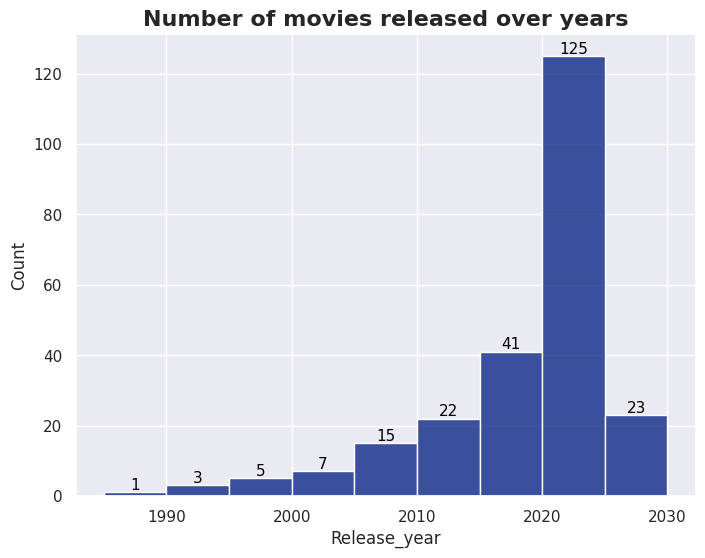

In [253]:
# Plotting the Histogram using seaborn and matplotlib with 5 years as bins
plt.figure(figsize=(8,6))
plt.title('Number of movies released over years',fontdict={'fontsize':16,'fontweight':'bold'})
ax = sns.histplot(data=df, x='Release_year', bins=[1985,1990,1995,2000,2005,2010,2015,2020,2025,2030])

# To put text in the bins/patches
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        y = height +2
        ax.text(x, y, int(height), ha='center', va='center', color='black', fontsize=11)


plt.show()

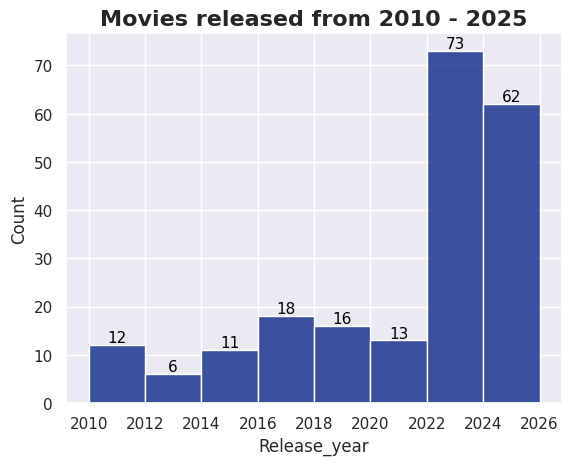

In [ ]:
# Zooming the plot for detailed view from 2010-2025

plt.title('Movies released from 2010 - 2025',fontdict={'fontsize':16,'fontweight':'bold'})

ax=sns.histplot(data=df,x='Release_year',bins=[2010,2012,2014,2016,2018,2020,2022,2024,2026])

for patches in ax.patches:
  height=patches.get_height()
  x=patches.get_x()+patches.get_width()/2
  y=patches.get_height()+1.5
  ax.text(x,y,int(height), ha='center', va='center', color='black', fontsize=11)

plt.show()

### Average Ratings

In [ ]:
# calculating the average of the IMDb ratings

avg_rating=df['IMDb_Rating'].mean()
print(avg_rating)


8.005600000000001


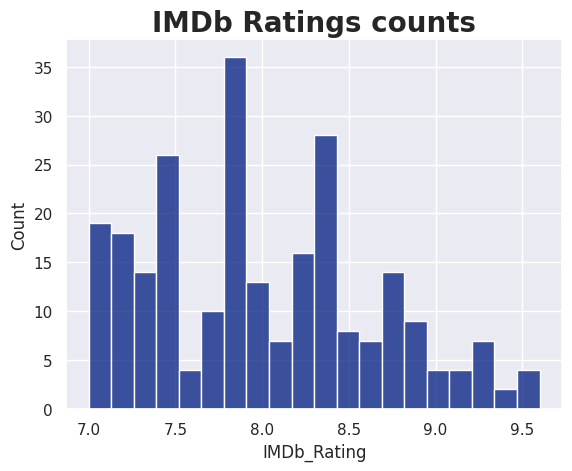

In [252]:
# Plotting Histogram for IMDb Ratings distribution

plt.title('IMDb Ratings counts',fontdict={'fontsize':20,'fontweight':'bold'})
sns.histplot(data=df, x='IMDb_Rating',bins=20)

plt.show()

### Most popular Genre


In [ ]:
#  Counting the Number of movies with particular Genres

df.Genre.value_counts() # df['Genre'].value_counts()

,count
Genre,
Drama,81
Comedy,52
Action,49
Crime,24
Romance,13
Thriller,13
Fantasy,6
Mystery,4
Horror,3


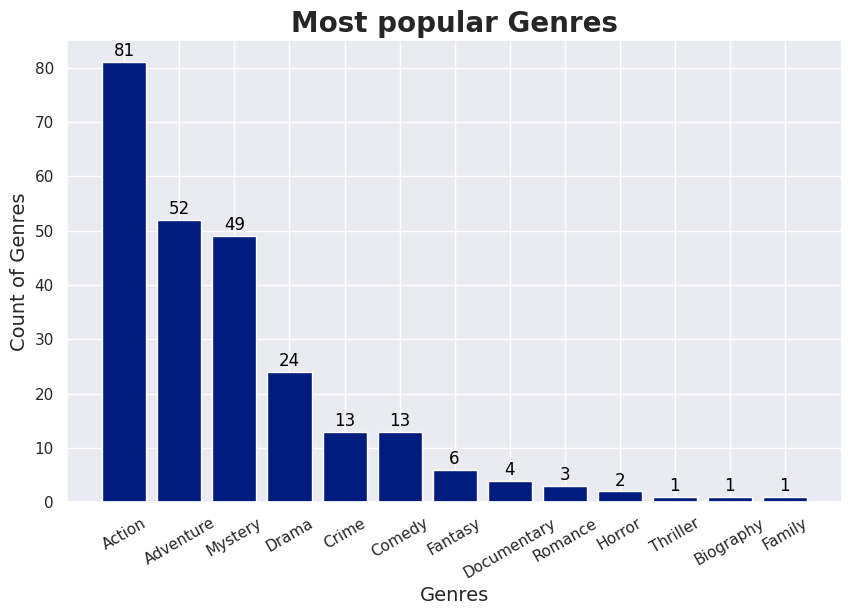

In [ ]:
# Plotting Bar chart

plt.figure(figsize=(10,6))

plt.title('Most popular Genres',fontdict={'fontsize':20,'fontweight':'bold'})

plt.xlabel('Genres',fontdict={'fontsize':14})
plt.ylabel('Count of Genres',fontdict={'fontsize':14})
plt.xticks(rotation=30)

Genre=df.Genre.unique()
Genre_counts=df.Genre.value_counts()

plt.bar(Genre,Genre_counts,width=0.8)
for i in range(len(Genre)):
    plt.text(Genre[i], Genre_counts.iloc[i]+2, str(Genre_counts.iloc[i]), ha='center', va='center', color='black', fontsize=12)


plt.show()

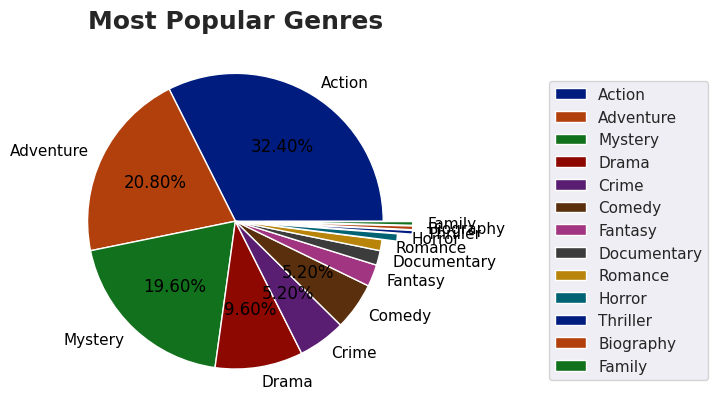

In [ ]:
# Plotting the pie chart for the same data

plt.title('Most Popular Genres',fontdict={'fontsize':18,'fontweight':'bold'})

explode=(0,0,0,0,0,0,0,0,0,0.1,0.2,0.2,0.2)

def autopct_func(pct):
  return f'{pct:.2f}%' if pct>5 else ""

plt.pie(Genre_counts,labels=Genre,autopct=autopct_func,textprops={'color':'black'},explode=explode)

plt.legend(bbox_to_anchor=(1.8,0.9),loc='upper right')

plt.show()

### Genre-wise Average ratings

In [ ]:
# Finding Genre-wise Average IMDb ratings using groupby function

avg_genre_ratings=df.groupby(['Genre'])['IMDb_Rating'].mean()
avg_genre_ratings

,IMDb_Rating
Genre,
Action,7.871429
Adventure,8.600000
Biography,7.700000
Comedy,7.832692
Crime,7.795833
Documentary,8.900000
Drama,8.224691
Family,9.300000
Fantasy,8.116667


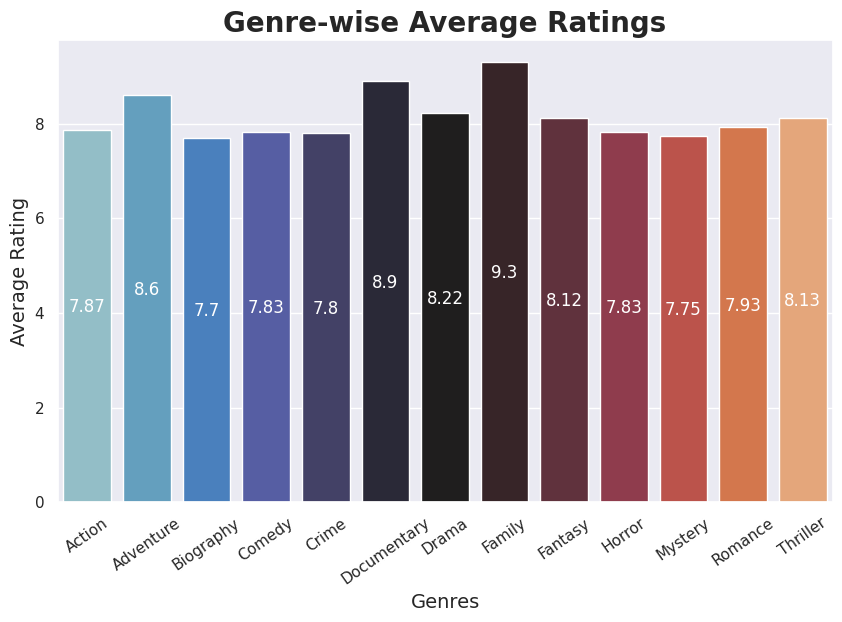

In [ ]:
plt.figure(figsize=(10,6)) # increasing the plot size to get a better and clean view

plt.title('Genre-wise Average Ratings',fontdict={'fontsize':20,'fontweight':'bold'})

plt.xlabel('Genres',fontdict={'fontsize':14})
plt.ylabel('Average Rating',fontdict={'fontsize':14})

plt.xticks(rotation=35)

sns.barplot(x=avg_genre_ratings.index, y=avg_genre_ratings.values,hue=avg_genre_ratings.index,palette='icefire')

for genre in avg_genre_ratings.index:
    plt.text(genre, avg_genre_ratings[genre]/2, round(avg_genre_ratings[genre], 2), ha='center', va='bottom', color='white', fontsize=12)

plt.show()

### Genre-wise Average number of Votes

In [ ]:
avg_genre_votes=df.groupby(['Genre'])['Number_of_ratings'].mean()
avg_genre_votes

,Number_of_ratings
Genre,
Action,10856.040816
Adventure,22101.500000
Biography,885.000000
Comedy,1341.500000
Crime,2198.541667
Documentary,3007.000000
Drama,1355.271605
Family,731.000000
Fantasy,1573.833333


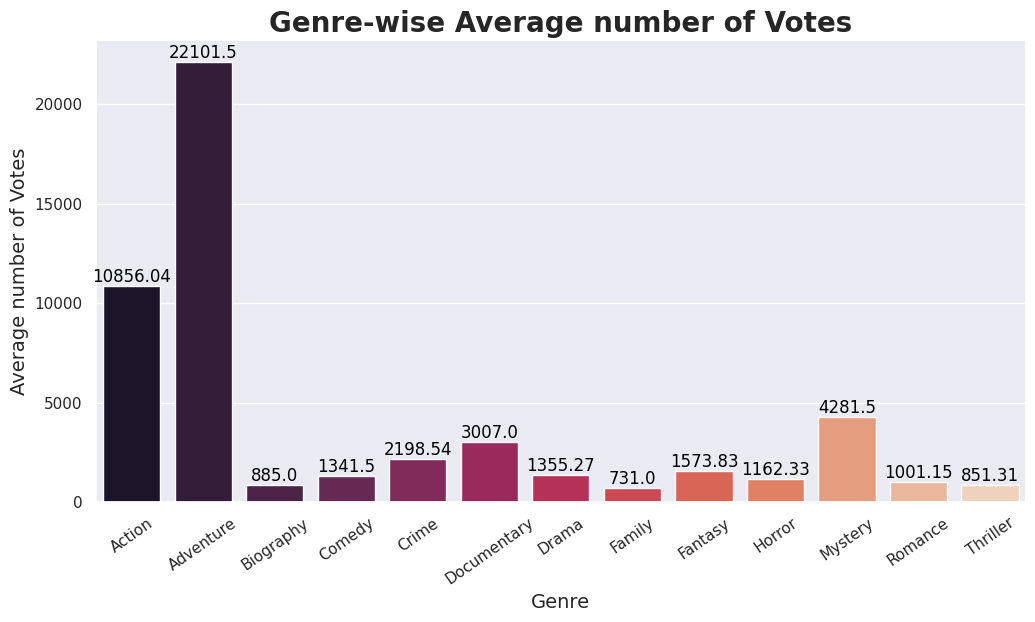

In [ ]:
plt.figure(figsize=(12,6))

plt.title('Genre-wise Average number of Votes',fontdict={'fontsize':20,'fontweight':'bold'})

plt.xlabel('Genre',fontdict={'fontsize':14})
plt.ylabel('Average number of Votes',fontdict={'fontsize':14})
plt.xticks(rotation=35)

sns.barplot(x=avg_genre_votes.index, y=avg_genre_votes.values,hue=avg_genre_votes.index,palette='rocket')

for genre in avg_genre_votes.index:
    plt.text(genre, avg_genre_votes[genre]+2, round(avg_genre_votes[genre], 2), ha='center', va='bottom', color='black', fontsize=12)

plt.show()

In [ ]:
# Adventure movies
df[df['Genre']=='Adventure']

,Title,Release_year,Genre,IMDb_Rating,Number_of_ratings
4,777 Charlie,2022,Adventure,8.7,43659
180,Vikaasaparva,2024,Adventure,8.5,544


In [ ]:
# Top 10 Action Movies (Based on number of votes)

df[df['Genre']=='Action'][0:11]

,Title,Release_year,Genre,IMDb_Rating,Number_of_ratings
0,K.G.F: Chapter 2,2022,Action,8.2,159891
1,Kantara,2022,Action,8.2,108307
2,K.G.F: Chapter 1,2018,Action,8.2,105348
3,Kaiva,2023,Action,8.2,68982
9,Avane Srimannarayana,2019,Action,7.7,8687
11,James,2022,Action,7.3,8658
12,Uppi 2,2015,Action,7.8,8532
15,Ugramm,2014,Action,8.0,7472
17,Raajakumara,2017,Action,7.9,4733
19,Sapta Sagaradaache Ello: Side B,2023,Action,8.0,4689


### Year-wise Average IMDb Ratings

In [ ]:
# Finding Year-wise Average IMDb ratings using groupby() function

avg_year_ratings=df.groupby(['Release_year'])['IMDb_Rating'].mean()

avg_year_ratings

,IMDb_Rating
Release_year,
1971,8.900000
1972,8.950000
1973,8.800000
1974,8.800000
1976,8.900000
1977,8.800000
1983,8.600000
1987,7.800000
1990,8.200000


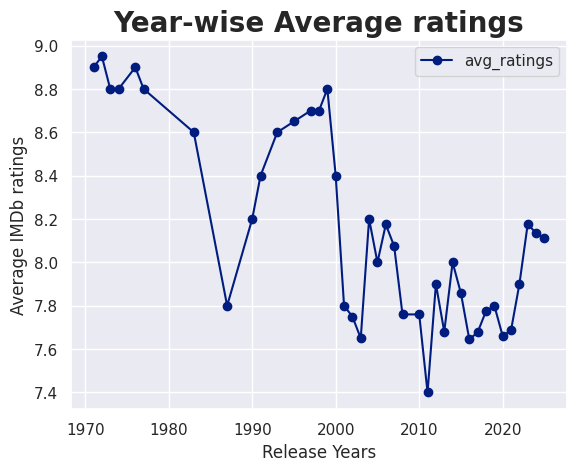

In [ ]:
# Plotting Year-wise average ratings Line chart

plt.title('Year-wise Average ratings',fontdict={'fontsize':20,'fontweight':'bold'})

plt.xlabel('Release Years')
plt.ylabel('Average IMDb ratings')

x=avg_year_ratings.index
y=avg_year_ratings.values
plt.plot(x,y,label='avg_ratings',marker='o')

plt.legend()

plt.show()

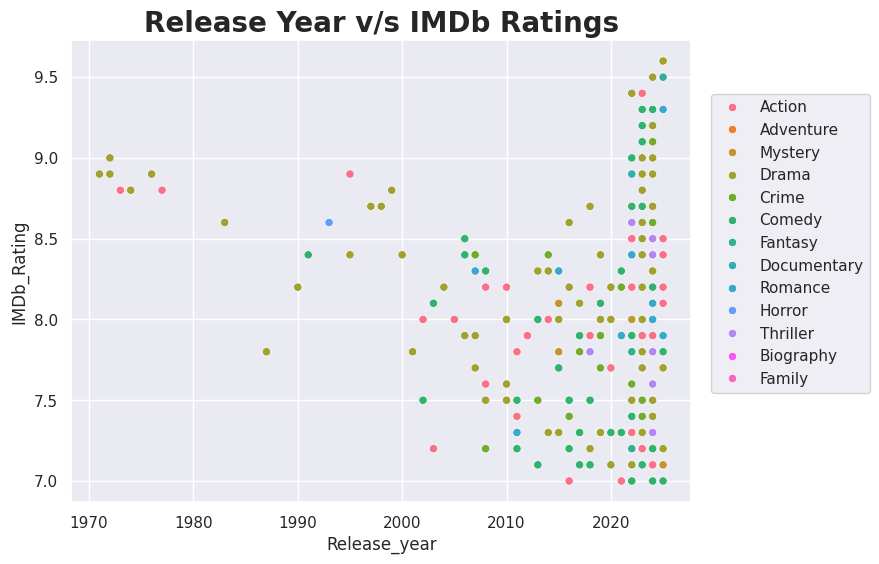

In [244]:
# Scatterplot of Release_year v/s IMDb_Rating
plt.figure(figsize=(8,6))

plt.title('Release Year v/s IMDb Ratings',fontdict={'fontsize':20,'fontweight':'bold'})

sns.scatterplot(data=df,x='Release_year',y="IMDb_Rating",hue='Genre')
plt.legend(bbox_to_anchor=(1.3,0.9)) # Adjusting position of legend box in the plot

plt.show()

### Year-wise Average Number of Votes

In [ ]:
# Finding Year-wise avg number of votes using groupby() function

avg_year_votes=df.groupby(['Release_year'])['Number_of_ratings'].mean()
avg_year_votes

,Number_of_ratings
Release_year,
1971,468.000000
1972,1145.000000
1973,439.000000
1974,466.000000
1976,382.000000
1977,518.000000
1983,384.000000
1987,568.000000
1990,332.000000


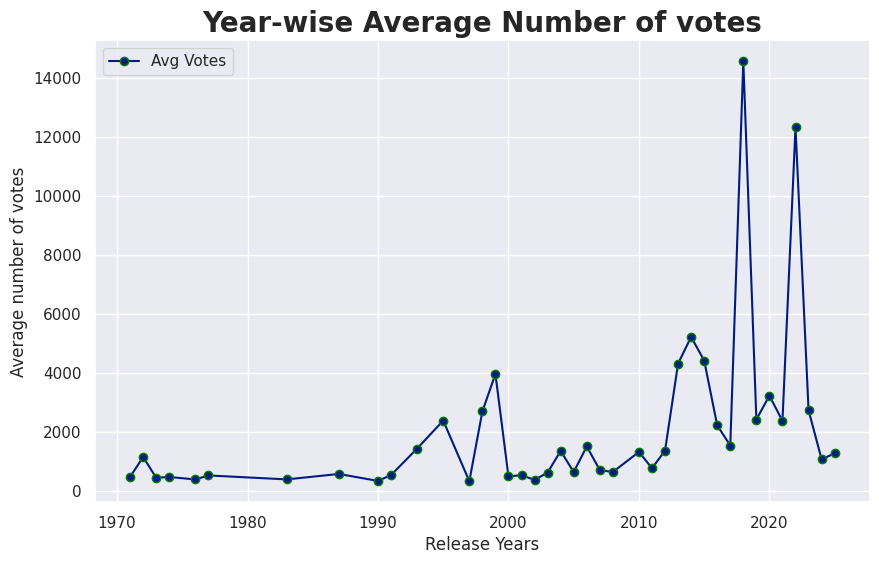

In [249]:

plt.figure(figsize=(10,6))
plt.title('Year-wise Average Number of votes',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Release Years')
plt.ylabel('Average number of votes')

x=avg_year_votes.index
y=avg_year_votes.values
plt.plot(x,y,label='Avg Votes',marker='o',markeredgecolor='green')

plt.legend()
plt.show()

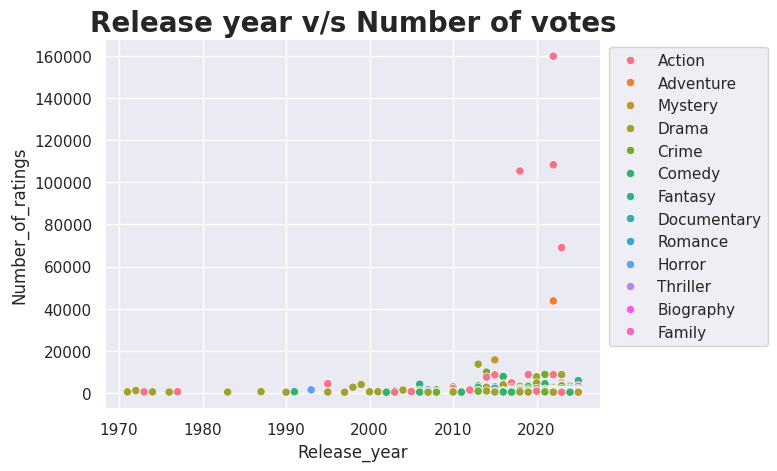

In [302]:

plt.title('Release year v/s Number of votes',fontdict={'fontsize':20,'fontweight':'bold'})

sns.scatterplot(data=df,x='Release_year',y="Number_of_ratings",hue='Genre')
plt.legend(bbox_to_anchor=(1,1)) # Adjusting position of legend box in the plot

plt.show()

In [ ]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()

,Release_year,IMDb_Rating,Number_of_ratings
Release_year,1.000000,-0.145149,0.056641
IMDb_Rating,-0.145149,1.000000,0.039486
Number_of_ratings,0.056641,0.039486,1.000000


### Ratings v/s Number of Ratings

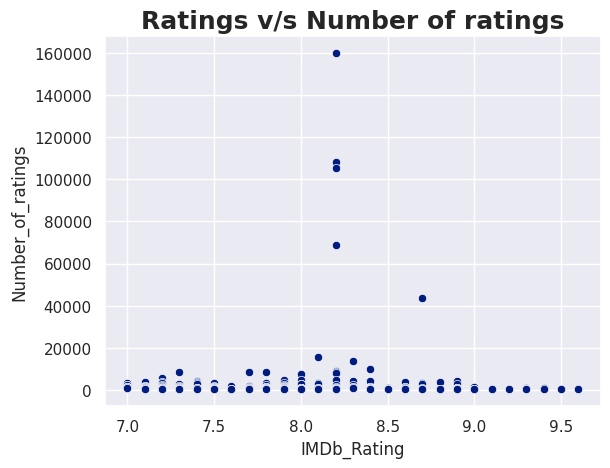

In [325]:
plt.title('Ratings v/s Number of ratings',fontdict={'fontsize':18,'fontweight':'bold'})
sns.scatterplot(data=df,x='IMDb_Rating',y='Number_of_ratings')
plt.show()

In [327]:
# We observe 2022 is the year where more hit films are released, we now calculate the contribution of 2022 in films

pct=len(df[df.Release_year==2022])/len(df)*100
print(f'{pct:.3f}%')

11.200%


In [315]:
df.sort_values('IMDb_Rating',ascending=False)
# we notice that even though less number of people have voted, but still some movies are highly rated. and are recently released in 2025

,Title,Release_year,Genre,IMDb_Rating,Number_of_ratings
197,Yello Jogappa Ninnaramane,2025,Drama,9.6,513
211,Tapassi,2025,Drama,9.6,444
199,Kandor Mane Kathe,2024,NaN,9.5,495
181,Monk the Young,2025,Fantasy,9.5,542
138,Suraari,2023,Action,9.4,776
...,...,...,...,...,...
86,Home Minister,2022,Action,7.0,1125
46,Murphy,2024,Romance,7.0,2382
32,Nimma Vasthugalige Neeve Javaabdaararu,2025,Crime,7.0,3251
50,Pratyartha,2025,Comedy,7.0,2157


## Key Takeaways

### Genre trends
- Action and Adventure are the are the most dominant genres in top-rated Kannada movies.
- Adventure genre has got most number of votes.
-Genres like Documentary,Drama and family appears less but are highly rated.




### Year-wise contribution
- 2022 is the top performing year.
- 2022 has alone contributed 11.20% of the top-rated Kannada movies.
- Most top-rated movies were released after 2015, with a strong spike post-2020.

### Rating v/s Number of votes
- It is noticed that even though less number of people have voted, but still some movies are highly rated. and most of them are recently released in 2025.

### Top performers
- Top 3 most-rated Kannada movies
  1. KGF:Chapter-2(2022)
  2. Kantara(2022)
  3. KGF:Chapter(2018)
- Highest-rated film : Yello Jogappa Ninnaramane with rating of 9.6 released in 2025